In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Elastic Pendulum Tutorial #

<div style="text-align: center;">
    <img src="images/image.jpg" alt="Elastic Pendulum" width="500"/>
</div>

We are looking at a pendulum suspended on a spring! The equations of motion lead to some pretty wacky and interesting behavior, as it describes a system with chaotic behavior. We will not go through the entire derivation of the equations of motion here because it involes Lagrangian Mechanics and ODEs, but here are some amazing resources that walk through the process:
* [Wikipedia: Elastic Pendulum - Equations of Motion](https://en.wikipedia.org/wiki/Elastic_pendulum#Equations_of_motion)
* [Youtube: Equations of Motion for an Elastic Pendulum](https://www.youtube.com/watch?v=iULa9A00JpA)
* [Youtube: Introduction to Lagrangian (and Hamiltonian) Mechanics](https://www.youtube.com/watch?v=0DHNGtsmmH8&t=413s&pp=ygUabGFncmFuZ2lhbiBtZWNoYW5pY3MgaW50cm8%3D)
  
And on the more research paper-y side:
* [The Swinging Spring: A simple Model for Atmospheric Balance](https://maths.ucd.ie/~plynch/Publications/AOD_Paper.pdf)
* [Stability Condition for Vertical Oscillation of 3-dim Heavy Spring Elastic Pendulum](https://www.nhn.ou.edu/~johnson/Education/Juniorlab/Pendula/2008-Pokorny-Chaos-ElasticPendulum.pdf)


### Equations of Motion for an Elastic Pendulum ###

How can we describe this system? We think about degrees of freedom, or the ways in which a system can change and then subsequently be described. A simple pendulum with a fixed length and a single bob has 1 degree of freedom. You can describe it with two variables (like x and y), but because the system has been constrained we can also describe it with only a single angle giving one degree of freedom ([read more about lagrangian mechanics and DOF here](https://www.damtp.cam.ac.uk/user/tong/dynamics/two.pdf))! 

When we add more complexity to a system, it can add more degrees of freedom because the system can move in different ways. With an elastic pendulum, there are **two degrees of freedom**: the angle of the pendulum arm and the length of pendulum arm (how much the spring has stretched). We will use $\theta$ to describe the angle and $x$ to describe the length. The resources above give great explanations of how to derive the equations of motion for this system using Lagrangian Mechanics; following this process we find:

$$ \begin{align}  \ddot{x} =& \ (l_0 + x)\dot{\theta}^2 - \frac{k}{m} x + g \cos \theta \\ \ddot{\theta} =& \ - \frac{g}{l_0 + x} \sin \theta - \frac{2}{l_0 + x} \dot{x}\dot{\theta}  \end{align}$$

The dots above $\theta$ and $x$ describe time derivates. One dot is the first time derivative $\dot{y} \equiv \frac{dy}{dt}$ and $\ddot{y} \equiv \frac{d^2y}{dt^2}$, so these equations of motion give us the acceleration for $\theta$ and $x$. We can see that the behavior of each variable is dependent on the position and acceleration of each variable, creating a complex system of differential equations. This dependency can result in complex and chaotic behavior. While some arrangements of this system can be solved on paper, **the complete behavior of an elastic pendulum needs to be solved for numerically** – what this activity is all about!

### Numerical Methods for ODEs ###

There are many different ways to numerically solve differential equations, two especially prevalent approaches are Euler's Method and the Runge-Kutta Methods. Runge-Kutta is much faster and more accurate, so it will be used in most real-world numerical modeling of ODEs. Euler's Method falls short in performance and accuracy, but we will start with Euler's because it is much more intuitive. For more context on Runge-Kutta vs Euler's, this video is a great resource: [Why Runge-Kutta is SO Much Better Than Euler's Method - Phanimations](https://www.youtube.com/watch?v=dShtlMl69kY&t=175s&pp=ygULcnVuZ2Uga3V0dGE%3D). Also check out the Wikipedia page on [Numerical Methods for ODEs](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations) and [Paul's Online Math Notes on Euler's Method](https://tutorial.math.lamar.edu/classes/de/eulersmethod.aspx).

#### Explicit Euler's Method ####

Explicit Euler's method is one of the most straightforward methods of numerically solving ODEs; it boils down to incrementing each variable  given the change that the is described by each differential equation over a small change in time. You can think of it as an integral, but $dt$ can't be infinitely small when we're dealing with numbers stored on computers. It boils down to the following formula:

$$ y(t+\Delta t) \approx y(t) + \frac{dy(t)}{dt}\Delta t$$

Here we take the change in $y$ at some time $t$, and we multiply by a small time step $\Delta t$, giving us a linear approximation of how $y$ will change over time. We get to decide how big to make $\Delta t$, and this in turn will determine the accuracy and speed of our numerical integration (a term for numerical solving an ODE).

We can see how this very simple method will work with a short bit of code and a simple ODE:
$$ \frac{dy}{dt} = \dot{y} = y $$

In [48]:
## Set up initial variables we need
init_y = 5 # arbitrary starting value of y
delta_t = 0.01 # step size of 0.01 seconds
total_time = 10 # total time to observe the motion in seconds
num_steps = int(total_time/delta_t) # number of steps in the total time

## Set up list to store y's trajectory in, empty (filled with zeroes)
y = [0 for i in range(0,num_steps)]
y[0] = init_y # set initial position of y

## Step through!
for i in range(0,num_steps-1): # we are always updating the next element (i+1), so we do num_steps-1
    dydt = y[i] # get last element of y's motion
    y[i+1] = y[i] + dydt*delta_t
    
print(f"Number of Steps: {num_steps:.1e}")

Number of Steps: 1.0e+03


y at time t = 10s: 103758.19622680038


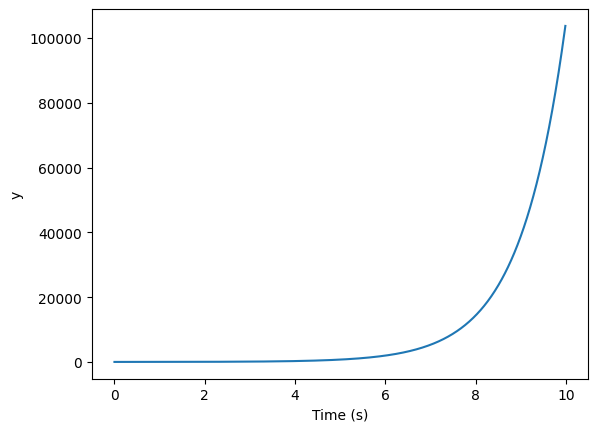

In [49]:
# What does it look like?
times = [t for t in np.arange(0, total_time, delta_t)]
plt.plot(times,y)
plt.xlabel("Time (s)")
plt.ylabel("y")
print(f"y at time t = 10s: {y[int(10/delta_t)-1]}") # Looks complicated, but we can talk about it!

We actually know the analytical solution to this formula too! We can solve to get:
$$ \frac{dy}{dt} = y \text{ where } y(0) = 5 \implies y = 5e^x $$
Our numerical solution looks suspiciously similar to this function!

<div style="text-align: center;">
    <img src="images/desmos.png" alt="Elastic Pendulum" width="650"/>
</div>

and we can even compare the single value solution it gives us for y(t=10):

| Numerical Solution | Analytical Solution |
|----------|----------|
| 103758.196 | 110132.329 |

**it's close!** Find out what happens to the accuracy of the estimate as we change the step size and total time that we integrate over. Now that we've proven to ourselves that Euler's method can find a good approximation, let's apply it to the more complex system of the elastic pendulum!

## Finally! Numerically Solving the Elastic Pendulum ##

For a simple ODE like the first one we looked at, numerical methods aren't really necessary because we can solve it analytically. However, most of the exciting systems and pieces of the world that are in motion around us follow very complex and analytically-unsolvable differential equations. Everything from weather modeling to quantum computing involves differential equations that need to be solved numerically! 

Up to this point, we have only addressed first order differential equations (where we are only ever taking a first derivative), however, the elastic pendulum (and many other systems) involve higher order differentiation (e.g. $\frac{d^2y}{dt^2}$), how can we address these deeper levels of differentiation? We can just treat it as multiple layers of the same method! Now we have two relationships:
$$ y(t+\Delta t) \approx y(t) + \frac{dy(t)}{dt}\Delta t$$
and
$$ \frac{dy(t+\Delta t)}{dt} \approx \frac{dy(t)}{dt} + \frac{d^2y(t)}{dt^2}\Delta t.$$
A good way to think about this relationship is moving between acceleration, velocity, and position. Using these ideas, we can begin to numerically solve the formulas that describe our pendulum:

$$ \begin{align}  
&\ddot{x}(t) = (l_0 + x(t))\dot{\theta}(t)^2 - \frac{k}{m} x(t) + g \cos \theta(t) \\ 
&\ddot{\theta}(t) = - \frac{g}{l_0 + x(t)} \sin \theta(t) - \frac{2}{l_0 + x(t)} \dot{x}(t)\dot{\theta}(t) \\ 
&\dot{x}(t+\Delta t) = \dot{x}(t) + \ddot{x}(t) \cdot \Delta t \\
&\dot{\theta}(t+\Delta t) = \dot{\theta}(t) + \ddot{\theta}(t) \cdot \Delta t \\
&{x}(t+\Delta t) = {x}(t) + \dot{x}(t) \cdot \Delta t \\
&{\theta}(t+\Delta t) = {\theta}(t) + \dot{\theta}(t) \cdot \Delta t \\
\end{align}$$

It looks a bit scary, and it can be, but we can work through it very iteratively to solve the system.

## The Code! ##

#### Numerical Integration Coniguration

In [120]:
## Set up step size, period of integration, etc.
delta_t = 0.001 # seconds
total_time = 25 # seconds
num_steps = int(total_time/delta_t)

## Set up lists to store relevant variables
x = [0]*num_steps
theta = [0]*num_steps
x_dot = [0]*num_steps
theta_dot = [0]*num_steps
x_d_dot = [0]*num_steps
theta_d_dot = [0]*num_steps


#### Physical Parameters and Constants

In [132]:
## Set Initial Physical Parameters and Constants
k = 1.0 # N/m
m = 2.0 # kg
g = 9.8 # m/2^2
l_0 = 6.0 # m

## Set Initial Values
x_0 = 0 #m, spring begins at equilibrium
theta_0 = np.pi/3 # 60 degrees
x_dot_0 = 0 # m/s, spring begins at rest
theta_dot_0 = 0 # rad/s, pendulum is released from rest

## Update lists
x[0] = x_0
theta[0] = theta_0
x_dot[0] = x_dot_0
theta_dot[0] = theta_dot_0

#### Step Forward in Time

In [133]:
for t in range(0,num_steps-1):
    ## Find second derivaties first (accelerations)
    x_d_dot[t] = (l_0 + x[t])*((theta_dot[t]))**2 - (k/m)*x[t] + g*np.cos(theta[t])
    theta_d_dot[t] = -(g/(l_0 + x[t]))*np.sin(theta[t]) - (2/(l_0 + x[t]))*x_dot[t]*theta_dot[t]
    
    ## Then find change in the velocity from these accelerations
    x_dot[t+1] = x_dot[t] + x_d_dot[t]*delta_t
    theta_dot[t+1] = theta_dot[t] + theta_d_dot[t]*delta_t
    
    ## Then find the change in position from the velocity
    x[t+1] = x[t] + x_dot[t]*delta_t
    theta[t+1] = theta[t] + theta_dot[t]*delta_t

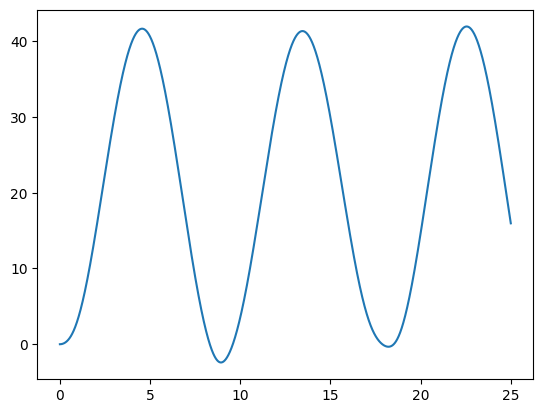

In [ ]:
times = [t for t in np.arange(0,total_time,delta_t)]

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline

columns=['a','b','c']
data = np.cumsum(np.random.rand(10,3),axis=1)
df = pd.DataFrame(data,columns=columns)

def g(x,y):
    plt.scatter(df[x], df[y])
    plt.show()

interactive_plot = interactive(g, x=columns, y=columns)
interactive_plot

interactive(children=(Dropdown(description='x', options=('a', 'b', 'c'), value='a'), Dropdown(description='y',…